In [1]:
import pandas as pd
import numpy as np
from dotenv import dotenv_values, find_dotenv
import matplotlib.pyplot as plt
import os
config = dotenv_values(find_dotenv())
path_cleandata = os.path.abspath(config["CLEANDATA"]) + '\\'
path_figures = os.path.abspath(config["FIGURES"]) + '\\'

In [37]:
# import my merged data
data = pd.read_pickle(path_cleandata + 'BEA6_naics6_merged.pkl')

In [38]:
# filter for the year 2017 
data2017 = data[data['date'].dt.year == 2017]

In [39]:
# personal consumption expenditures
data2017 = data2017[data2017['product_O'].str.contains('Personal consumption expenditures')][['product_I', 'date', 'IO_value', 'expenditures_I']]

In [40]:
# sum by product for that year
# first groupby: take sum of IO_value and mean of expenditures_I by date and product
byproduct = data2017.groupby(['product_I']).agg({
    'IO_value': 'mean',
    'expenditures_I': 'sum'}, min_count=1).reset_index()


## taking a look at how well the merge worked

In [41]:
# create distance variable
byproduct['distance'] = np.abs(byproduct['IO_value'] - byproduct['expenditures_I'])

# kinda "outliers" that have a very different value
outlier_threshold = 200000

# Filter only the points that are outliers
outliers = byproduct[byproduct['distance'] > outlier_threshold]

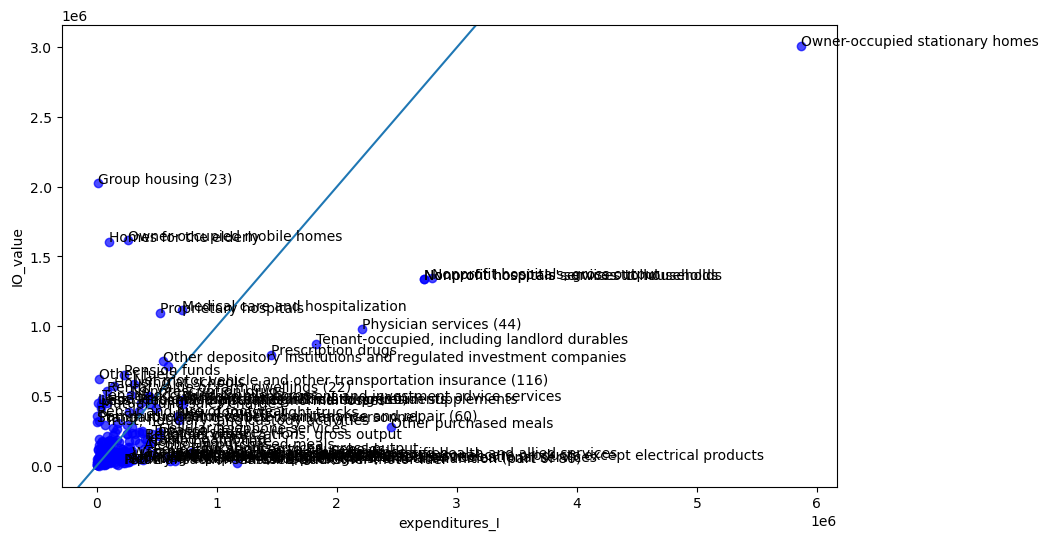

In [42]:
# do the scatter plot with expenditures on the x axis

plt.figure(figsize=(10, 6))
plt.scatter(byproduct['expenditures_I'], byproduct['IO_value'], c='blue', alpha=0.7)

plt.xlabel('expenditures_I')
plt.ylabel('IO_value')

ax = plt.gca()
ax.axline((0, 0), slope=1)

# annotations for outliers
for idx, row in outliers.iterrows():
    ax.annotate(row['product_I'].strip(), (row['expenditures_I'], row['IO_value']))

plt.savefig(path_figures + 'merge_check\\expenditures.pdf')

In [43]:
# this is the list of "outlier" products: issues mostly come from housing and healthcare type stuff
# noting the 2017 expenditures for tenant-occupied stationary houses is 0: having trouble getting min_count to work (actually all NaNs)
# within the merge, foreign travel in the United States gets matched with the rest-of-world adjustment in the IO table, which i should probably get rid of
outliers

,product_I,IO_value,expenditures_I,distance
2,Alcohol in purchased meals,1.206325e+05,396764.0,2.761315e+05
4,"Amusement parks, campgrounds, and related recr...",2.902945e+04,267259.0,2.382295e+05
13,"Cable, satellite, and other live television se...",3.900869e+04,384044.0,3.450353e+05
16,Casino gambling,1.600034e+05,447433.0,2.874296e+05
17,Cellular telephone services,2.385090e+05,521649.0,2.831400e+05
34,Dental services (45),2.148338e+05,517260.0,3.024262e+05
38,Education services to households,8.385016e+04,466344.0,3.824938e+05
39,"Education services, gross output",9.743943e+04,792269.0,6.948296e+05
54,"Food products, not elsewhere classified",5.928304e+04,647815.0,5.885320e+05
57,Foreign travel in the United States,3.437593e+04,614049.0,5.796731e+05


In [44]:
# go into concordance, which shows some of the issues

concordance = pd.read_pickle(path_cleandata + 'concordance//concordance6_naics6_addproportions.pkl')
outlierproducts = list(outliers['product_I'])

outliermerges = concordance[concordance['product'].isin(outlierproducts)]
outliermerges



,product,NAICS_desc,IO_proportions
3,Portfolio management and investment advice ser...,Other financial investment activities,0.342335
4,Portfolio management and investment advice ser...,Management consulting services,1.000000
5,Portfolio management and investment advice ser...,"Funds, trusts, and other financial vehicles",0.351590
15,Owner-occupied mobile homes,Owner-occupied housing,0.042088
32,Less: Household insurance normal losses,"Insurance carriers, except direct life",0.043347
...,...,...,...
449,U.S. travel outside the United States,Travel arrangement and reservation services,0.277895
462,"Tenant-occupied, including landlord durables",Tenant-occupied housing,0.867617
466,Other depository institutions and regulated in...,Other financial investment activities,0.264008
467,Other depository institutions and regulated in...,Monetary authorities and depository credit int...,0.295954


c:\Users\EmilyFu\.conda\envs\myenv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


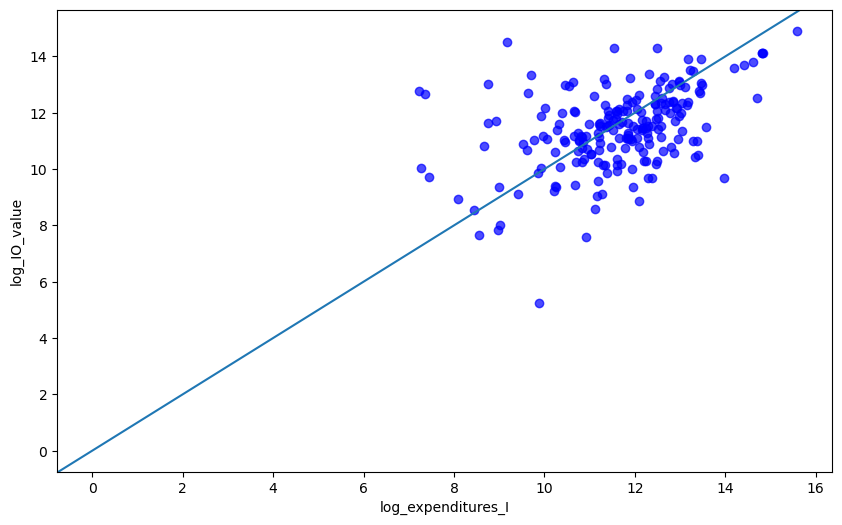

In [45]:
# get logs of everything and do an equivalent scatter plot with those

# do the scatter plot with expenditures on the x axis
plt.figure(figsize=(10, 6))
plt.scatter(np.log(byproduct['expenditures_I']), np.log(byproduct['IO_value']), c='blue', alpha=0.7)

plt.xlabel('log_expenditures_I')
plt.ylabel('log_IO_value')

ax = plt.gca()
ax.axline((0, 0), slope=1)

plt.savefig(path_figures + 'merge_check\\log_expenditures.pdf')
